# Merging Tables With Different Join Types

## Imports

In [38]:
import pandas as pd
import matplotlib.pyplot as plt

In [58]:
movies = pd.read_pickle('../data/movies.p')
financials = pd.read_pickle('../data/financials.p')
taglines = pd.read_pickle('../data/taglines.p')
movie_to_genres = pd.read_pickle('../data/movie_to_genres.p')
actors_movies = pd.read_csv('../data/actors_movies.csv')
casts = pd.read_pickle('../data/casts.p')
crews = pd.read_pickle('../data/crews.p')
ratings = pd.read_pickle('../data/ratings.p')
sequels = pd.read_pickle('../data/sequels.p')

In [75]:
toy_story = movies[movies['title'].str.contains("Toy Story")].copy()
scifi_movies = movie_to_genres[movie_to_genres['genre'] == 'Science Fiction'].copy()
action_movies = movie_to_genres[movie_to_genres['genre'] == 'Action'].copy()
pop_movies = movies[movies['popularity'] >= 203.73].sort_values(by='popularity', ascending=False).copy()
iron_1_actors = casts[casts['movie_id'] == 1726][['character', 'id', 'name']].copy()
iron_2_actors = casts[casts['movie_id'] == 10138][['character', 'id', 'name']].copy()

## Left join

### Counting missing rows with left join

In [4]:
# Merge movies and financials with a left join
movies_financials = movies.merge(financials, on='id', how='left')

# Count the number of rows in the budget column that are missing
number_of_missing_fin = movies_financials['budget'].isna().sum()

# Print the number of movies missing financials
print(number_of_missing_fin)

1574


### Enriching a dataset

In [20]:
# Merge the toy_story and taglines tables with a left join
toystory_tag = toy_story.merge(taglines, on='id', how='left')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
2    862    Toy Story   73.640445   1995-10-30                       NaN
(3, 5)


In [21]:
# Merge the toy_story and taglines tables with a inner join
toystory_tag = toy_story.merge(taglines, on='id', how='inner')

# Print the rows and shape of toystory_tag
print(toystory_tag)
print(toystory_tag.shape)

      id        title  popularity release_date                   tagline
0  10193  Toy Story 3   59.995418   2010-06-16  No toy gets left behind.
1    863  Toy Story 2   73.575118   1999-10-30        The toys are back!
(2, 5)


## Other joins

### Right join to find unique movies

In [29]:
# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right')

# Merge action_movies to scifi_movies with right join
action_scifi = action_movies.merge(scifi_movies, on='movie_id', how='right',
                                   suffixes=('_act', '_sci'))

# Print the first few rows of action_scifi to see the structure
print(action_scifi.head())

# From action_scifi, select only the rows where the genre_act column is null
scifi_only = action_scifi[action_scifi['genre_act'].isna()]

# Merge the movies and scifi_only tables with an inner join
movies_and_scifi_only = movies.merge(scifi_only, left_on='id', right_on='movie_id', how='inner')

# Print the first few rows and shape of movies_and_scifi_only
print(movies_and_scifi_only.head())
print(movies_and_scifi_only.shape)

   movie_id genre_act        genre_sci
0        11    Action  Science Fiction
1        18    Action  Science Fiction
2        19       NaN  Science Fiction
3        38       NaN  Science Fiction
4        62       NaN  Science Fiction
      id                         title  popularity release_date  movie_id  \
0  18841  The Lost Skeleton of Cadavra    1.680525   2001-09-12     18841   
1  26672     The Thief and the Cobbler    2.439184   1993-09-23     26672   
2  15301      Twilight Zone: The Movie   12.902975   1983-06-24     15301   
3   8452                   The 6th Day   18.447479   2000-11-17      8452   
4   1649    Bill & Ted's Bogus Journey   11.349664   1991-07-19      1649   

  genre_act        genre_sci  
0       NaN  Science Fiction  
1       NaN  Science Fiction  
2       NaN  Science Fiction  
3       NaN  Science Fiction  
4       NaN  Science Fiction  
(258, 7)


### Popular genres with right join

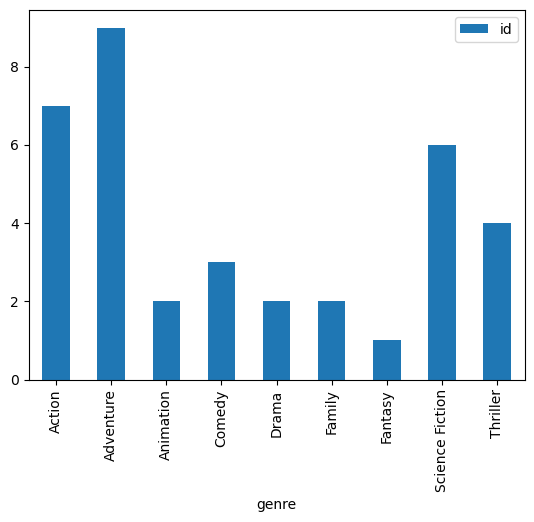

In [39]:
# Use right join to merge the movie_to_genres and pop_movies tables
genres_movies = movie_to_genres.merge(pop_movies, how='right', 
                                      left_on='movie_id', 
                                      right_on='id')

# Count the number of genres
genre_count = genres_movies.groupby('genre').agg({'id':'count'})

# Plot a bar chart of the genre_count
genre_count.plot(kind='bar')
plt.show()

### Using outer join to select actors

In [50]:
# Merge iron_1_actors to iron_2_actors on id with outer join using suffixes
iron_1_and_2 = iron_1_actors.merge(iron_2_actors,
                                     on='id',
                                     how='outer',
                                     suffixes=('_1','_2'))

# Create an index that returns true if name_1 or name_2 are null
m = ((iron_1_and_2['name_1'].isna()) | 
     (iron_1_and_2['name_2'].isna()))

# Print the first few rows of iron_1_and_2
print(iron_1_and_2[m].head())

                                    character_1      id           name_1  \
0                                        Yinsen   17857       Shaun Toub   
2                   Obadiah Stane / Iron Monger    1229     Jeff Bridges   
3  Lt. Col. James "Rhodey" Rhodes / War Machine   18288  Terrence Howard   
5                                          Raza   57452      Faran Tahir   
8                                    Abu Bakaar  173810    Sayed Badreya   

  character_2 name_2  
0         NaN    NaN  
2         NaN    NaN  
3         NaN    NaN  
5         NaN    NaN  
8         NaN    NaN  


## Merging a table to itself

### Self join

In [53]:
# Merge the crews table to itself
crews_self_merged = crews.merge(
    crews,
    on='id',
    how='inner',
    suffixes=('_dir', '_crew')
)

# Create a Boolean index to select the appropriate
boolean_filter = ((crews_self_merged['job_dir'] == 'Director') & 
     (crews_self_merged['job_crew'] != 'Director'))
direct_crews = crews_self_merged[boolean_filter]

# Print the first few rows of direct_crews
print(direct_crews.head())

        id department_dir   job_dir       name_dir department_crew  \
156  19995      Directing  Director  James Cameron         Editing   
157  19995      Directing  Director  James Cameron           Sound   
158  19995      Directing  Director  James Cameron      Production   
160  19995      Directing  Director  James Cameron         Writing   
161  19995      Directing  Director  James Cameron             Art   

           job_crew          name_crew  
156          Editor  Stephen E. Rivkin  
157  Sound Designer  Christopher Boyes  
158         Casting          Mali Finn  
160          Writer      James Cameron  
161    Set Designer    Richard F. Mays  


### Index merge for movie ratings

In [56]:
# Merge to the movies table the ratings table on the index
movies_ratings = movies.merge(ratings, on='id', how='left')

# Print the first few rows of movies_ratings
print(movies_ratings.head())

      id                 title  popularity release_date  vote_average  \
0    257          Oliver Twist   20.415572   2005-09-23           6.7   
1  14290  Better Luck Tomorrow    3.877036   2002-01-12           6.5   
2  38365             Grown Ups   38.864027   2010-06-24           6.0   
3   9672              Infamous    3.680896   2006-11-16           6.4   
4  12819       Alpha and Omega   12.300789   2010-09-17           5.3   

   vote_count  
0       274.0  
1        27.0  
2      1705.0  
3        60.0  
4       124.0  


### Do sequels earn more?

In [74]:
# Merge sequels and financials on index id
sequels_fin = sequels.merge(financials, on='id', how='left')

# Self merge with suffixes as inner join with left on sequel and right on id
orig_seq = sequels_fin.merge(sequels_fin, how='inner', left_on='sequel', 
                             right_on='id', right_index=False, # Use right_index=True in DataCamp 
                             suffixes=('_org','_seq'))

# Add calculation to subtract revenue_org from revenue_seq 
orig_seq['diff'] = orig_seq['revenue_seq'] - orig_seq['revenue_org']

# Select the title_org, title_seq, and diff 
titles_diff = orig_seq[['title_org', 'title_seq', 'diff']]

# Print the first rows of the sorted titles_diff
print(titles_diff.sort_values('diff', ascending=False).head())

            title_org        title_seq          diff
28  Jurassic Park III   Jurassic World  1.144748e+09
26      Batman Begins  The Dark Knight  6.303398e+08
11         Iron Man 2       Iron Man 3  5.915067e+08
1         Toy Story 2      Toy Story 3  5.696028e+08
14  Quantum of Solace          Skyfall  5.224703e+08
